# Probability Distribution
Probability distribution reflects the values of a variable that holds the probabilities of an experiment in mathematics, particularly in probability theory and statistics. Probability distributions are widely used in machine learning and data science. In the context of machine learning, we must deal with a large amount of data, and the process of detecting patterns in data requires a large number of studies based on the probability distribution.

# Elements of the probability distribution

There are the following functions used to obtain the probability distributions:
* **Probability Mass Function:** This function gives the similarity probability which is the probability of a discrete random variable to be equal to some value. We can also call it a discrete probability distribution.
* **Probability Density Function:** This function represents the density of a continuous random variable lying between specific range of values. We also call it continuous probability distribution.

# Probability Mass Function (Discrete Probability Distribution):
If $X$ is a discrete random variable, the function given by $f(x) = P(X=x)$ for each $x$ within the range of $X$ is called the **probability mass function**.

**Theorem**: A function can serve as the probability mass function of a discrete random variable $X$ if and only if its values, $f(x)$, satisfy the conditions.
1. $f(x)\geq 0$ for each value within its domain.
2. $\sum_x f(x) = 1$, where the summation extends over all the values within its domain.

In [2]:
import numpy as np 
from numpy.random import seed, randn 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 


### Question 1 
Check whether the below function serve as probability mass function
$$f(x) = \frac{x+3}{25} \text{ for } x =1,2,3,4,5.$$

In [3]:
f = lambda x: (x+3)/25
x = [1,2,3,4,5]

count = 0
tot = 0

for i in x:
    if f(i) >= 0:
        count += 1
        tot += f(i)
    else:
        break

if (count == len(x) and tot == 1):
    print("function is probability mass function") 
else:
    print("function is not probability mass function")    

function is not probability mass function


### Question 2 
Determine $k$ so that the function can serve as the probability distribution of a random variable with the given range:

$f(x) = kx^2$, for $x = 1,2,3,4,5$

In [4]:
f = lambda x: x^2

In [5]:
m = 5
tot = 0
for i in range(1,6):
    tot += f(i)

In [6]:
from sympy import symbols, solve, Eq

k = symbols('k')
eq = Eq(tot*k - 1,0)

sol = solve(eq)
print("The value of k is: ", sol)

The value of k is:  [1/17]


For $k = \frac{1}{17}$ given function serve as the probability distribution.

### Assignment 2
Determine $k$ so that the function can serve as the probability distribution of a random variable with the given range:

$f(x) = k(\frac{1}{4+x})$, for $x = 1,2,3,...$

In [7]:
f = lambda x: 1/(4+x)

In [8]:
from mpmath import nsum, inf

tot = nsum(f, [1, inf])

from sympy import symbols, solve, Eq

k = symbols('k')
eq = Eq(tot*k - 1,0)

sol = solve(eq)
print("The value of k is: ", sol)

The value of k is:  [0.282959219044746]


For $k = 0.283$ given function serve as the probability distribution.

The popular distributions under the discrete probability distribution categories are listed below how they can be used in python.
* Binomial distribution
* Poisson distribution
* Geometric distribution

## Binomial Distribution
 A random variable $X$ has a **binomial distribution** and it is referred to as a binomial random variable if and only if its probability is given by
 
 $b(x;n,r) = C^{n}_{r}p^r(1-p)^{(n-r)}$, $r = 0,1,2,...,n$

The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment.
#### Example
We could model flipping a fair coin $10$ times with a binomial distribution where the number of trials is set to $1000$ and the probability of success is set to $0.5$.

In this case the distribution would tell us how likely it is to get zero heads, 1 heads, 2 heads and so on.

In [9]:
from scipy.stats import binom

In [10]:
fair_coin_flips = binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=1000)  # Number of trials

In [11]:
import pandas as pd
print( pd.crosstab(index="counts", columns= fair_coin_flips))

col_0   1   2    3    4    5    6    7   8   9   10
row_0                                              
counts   9  45  132  214  238  191  125  34  11   1


[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

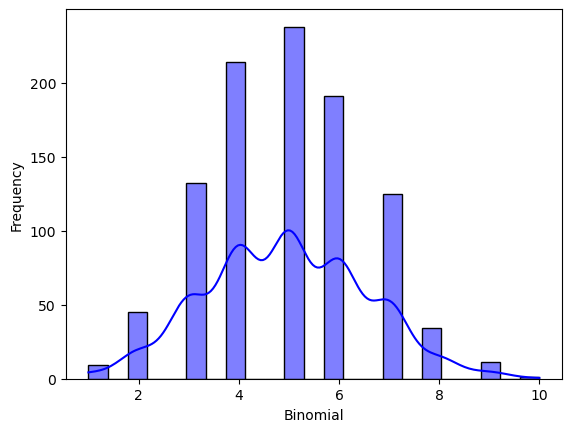

In [12]:
import seaborn as sns
ax = sns.histplot(fair_coin_flips,
                  kde=True,
                  color='blue')
ax.set(xlabel='Binomial', ylabel='Frequency')

Note that as the binomial distribution is discrete, it only takes on integer values therefore we can describe binomial data with a frequency table and its distribution using a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is essentially symmetric, with the most frequent events located at the centre. This resembles the normal distribution, however if we change the success probability, the distribution will no longer be symmetric:

In [13]:
biased_coin_flips = binom.rvs(n=10,      # Number of flips per trial
                                p=0.8,       # Success probability
                                size=1000)  # Number of trials

In [14]:
print( pd.crosstab(index="counts", columns= biased_coin_flips))

col_0   3   4   5   6    7    8    9    10
row_0                                     
counts   1   5  39  82  193  302  267  111


[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

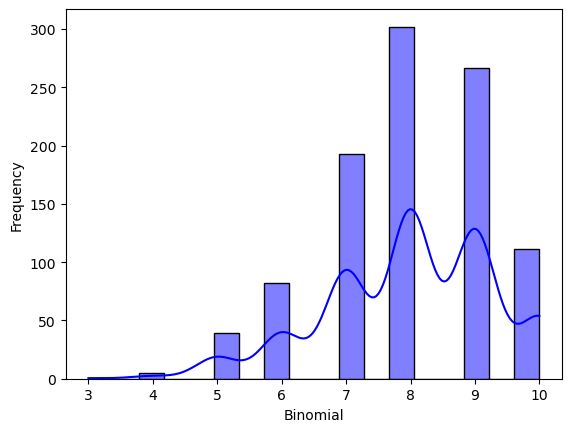

In [15]:
ax = sns.histplot(biased_coin_flips,
                  kde=True,
                  color='blue')
ax.set(xlabel='Binomial', ylabel='Frequency')

The **cdf()** function lets us check the probability of achieving a number of successes within a certain range:

In [16]:
binom.cdf(k=5,      # Probability of k = 5 successes or less
        n=10,       # With 10 flips
        p=0.8)      # And success probability 0.8

0.03279349759999997

In [17]:
1 - binom.cdf(k=8,        # Probability of k = 9 successes or more
            n=10,         # With 10 flips
            p=0.8)        # And success probability 0.8

0.37580963840000015

The **pmf()** function to check the proportion of observations at given number of successes k:

In [18]:
binom.pmf(k=5,      # Probability of k = 5 successes
        n=10,       # With 10 flips
        p=0.8)      # And success probability 0.8

0.026424115199999956

### Assignment 3
The probability of a customer ordering the colour of a particular model of new car in silver is 0.2. Find the probability that in next 30 random orders there will be:

a) exactly 10 orders in silver. 

b) at most 8 orders in silver.

c) no more than 11 orders in silver.  

In [19]:
# Exactly 2 correct
exact_10 = binom.pmf(k = 10, n = 30, p = 0.2)
print("Probability of exactly 10 orders in silver: ", exact_10)

Probability of exactly 10 orders in silver:  0.03547089295332892


In [20]:
# atmost 8 correct
atmost_8 = binom.cdf(k = 8, n = 30, p = 0.2)
print("Probability of 8 orders in silver: ", atmost_8)

Probability of 8 orders in silver:  0.8713492460859559


In [21]:
# no more than 11 orders in silver
atmost_11 = binom.cdf(k = 11, n = 30, p = 0.2)
print("Probability of no more than 11 orders in silver: ", atmost_11)

Probability of no more than 11 orders in silver:  0.9905068778252775


## Poisson Distribution
A random variable $X$ has a **Poisson distribution** and it is referred to as a Poisson random variable if and only if its probability distribution is given by
$p(x;\lambda) = \frac{\lambda^x e^{-\lambda}}{x!}$ for $x=0,1,2,...$

The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

Let's generate and plot some data from a Poisson distribution with an arrival rate of $1$ per time unit:

In [22]:
from scipy.stats import poisson

In [23]:
arrival_rate_1 = poisson.rvs(size=1000,  # Generate Poisson data
                            mu=1 )        # Average arrival time 1

In [24]:
# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

col_0     0    1    2   3   4  5
row_0                           
counts  392  349  175  64  17  3


[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

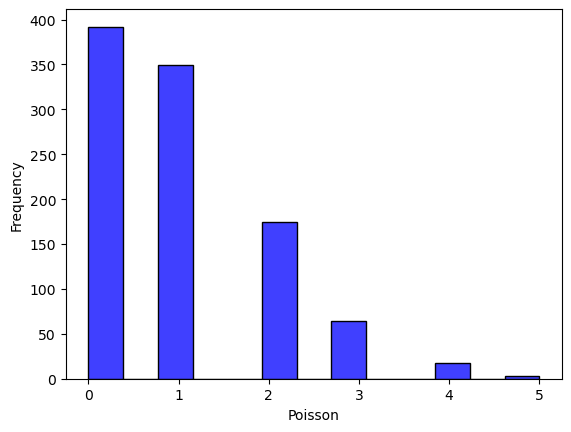

In [25]:
ax = sns.histplot(arrival_rate_1,
                  color='blue')
ax.set(xlabel='Poisson', ylabel='Frequency')

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

In [26]:
arrival_rate_10 = poisson.rvs(size=1000,  # Generate Poisson data
                            mu=10 )        # Average arrival time 10

In [27]:
print( pd.crosstab(index="counts", columns= arrival_rate_10))

col_0   1   2   3   4   5   6   7    8    9    10  ...  13  14  15  16  17  \
row_0                                              ...                       
counts   3   5   5  16  31  58  93  126  114  121  ...  82  50  32  19  18   

col_0   18  19  20  21  23  
row_0                       
counts   5   3   1   1   1  

[1 rows x 22 columns]


[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

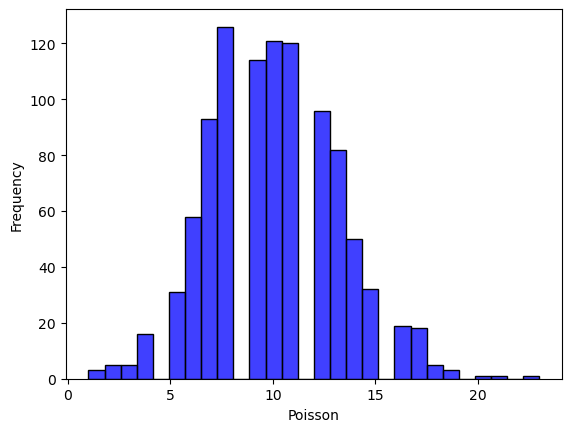

In [28]:
ax = sns.histplot(arrival_rate_10,
                  color='blue')
ax.set(xlabel='Poisson', ylabel='Frequency')

As with other discrete probability distributions, we can use **cdf()** to check the probability of achieving more or less than a certain number of successes and **pmf()** to check the probability of obtaining a specific number of successes:

In [29]:
poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
            mu=10)   # With arrival rate 10

0.06708596287903189

In [30]:
poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
            mu=10)    # With arrival rate 10

0.12511003572113372

### Assignment 4
A factory produces nails and packs them in boxes of 200. If the probability that a nail is substandard is 0.006, find the probability that a box selected at random contains at most two nails which are substandard. 

In [31]:
from scipy.stats import poisson

p = 0.006
n = 200
l = n*p
x = 2

pmf = poisson.cdf(x, l)

print("The probability that a box selected at random contains at most two nails which are substandard:", pmf)


The probability that a box selected at random contains at most two nails which are substandard: 0.8794870987836302


## Geometric Distribution
A random variable $X$ has a **geometric distribution** and it is referred to as a geometric random variable if and only if its probability distribution is given by:

$g(x;p) = (1-p)^{(x-1)}p$ for $x = 1,2,3,...$

Geometric distribution is  probability distribution for random variable $X$ represnting the number of trails will take to have first success.

Let's calculate the probability of $X = 1,2,3,...,10$ number of throws for first successful throw. Consider, probability of a perfect throw (sucess) is $0.6$.

In [32]:
from scipy.stats import geom

In [33]:
# X = Discrete random variable representing number of throws
# p = Probability of the perfect throw

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
p = 0.6

In [34]:
# Calculate geometric probability distribution

geom_pd = geom.pmf(X, p)

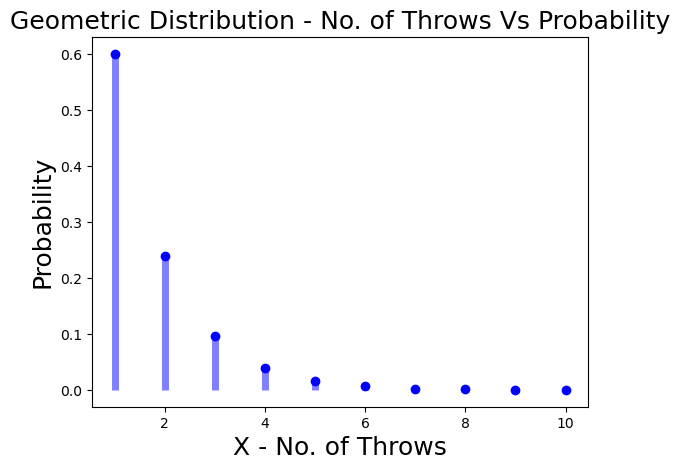

In [35]:
# Plot the probability distribution

import matplotlib.pyplot as plt

plt.plot(X, geom_pd, 'bo')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Throws", fontsize="18")
plt.title("Geometric Distribution - No. of Throws Vs Probability", fontsize="18")
plt.vlines(X, 0, geom_pd, colors = 'b', lw = 5, alpha = 0.5)
plt.show()

### Assignment 5
You play a game of chance that you can either win or lose (there are no other possibilities) until you lose. Your probability of losing is  p=0.57. What is the probability that it takes five games until you lose? 

In [36]:
p = 0.57 # probability of losing the game
r = 5  # number of trials
cdf = geom.pmf(r,p)

print("The probability that it takes five games until you lose:", cdf)

The probability that it takes five games until you lose: 0.01948716570000001


# Probability Density Function (Continuous Probability Distribution):
A function with values $f(x)$, defined over the set of all real numbers, is called a **probability density function** of the continuous random variable $X$ if and only if
$$P(a\leq X \leq b) = \int_a^b f(x) dx$$
for any real constants $a$ and $b$ with $a\leq b$.

**Theorem:** A function can serve as a probability density of a continuous random varibale $X$ if its values, $f(x)$, satisfy the conditions
1. $f(x) \geq 0$ for $-\infty < x < \infty$
2. $\int_{-\infty}^{\infty} f(x) dx = 1$

### Assignment 6
Determine the value of k for which the below function serve as probability density function
$$f(x) = k.x(16-x^2) \text{ for } 0\leq x \leq 4. $$ 

In [37]:
from scipy.integrate import quad

def integrand(x):
    return x * (16 - x**2)

result, error = quad(integrand, 0, 4) # 0 and 4 are lower and upper limits respectively.
k = 1 / result

print("The value of k is:", k)

The value of k is: 0.015625


### Assignment 7
Let $X$ be a continuous random variable whose probability density function is:
$$f(x) = 3.e^{-3x}, \text{ for } x > 0$$
* Find $P\{1 < X < 3\}$

In [38]:
import math


In [39]:
f = lambda x: 3*math.exp(-3*x) 

In [40]:
I = quad(f, 1, 3)[0] 
print("The required probability is ", I) 

The required probability is  0.04966365856377727


The popular distribution under the continuous probability distribution categories are listed below how they can be used in python:
* Uniform distribution
* Exponential distribution
* Normal distribution

## Uniform Distribution
A random variable has a **uniform distribution** and it is referred to as a continuous uniform random variabel if and only if its probability density is given by:

$u(x;\alpha,\beta) = \frac{1}{\beta - \alpha}$, for $\alpha < x < \beta$

The parameters $\alpha$ and $\beta$ of this probability density are real constants, with $\alpha < \beta$.

Uniform distribution is applicable where the likelihood of an event occurring is the same all through, such as when you roll a die one time, the probability that it falls on a number between $1$ and $6$ follows a uniform distribution because each number is equally likely to occur.

Let's generate some uniform data and plot a density curve:

In [41]:
from scipy.stats import uniform

In [42]:
uniform_data = uniform.rvs(size=10000,  # Generate 10000 numbers
                        loc = 0,       # From 0 
                        scale=10)      # To 10

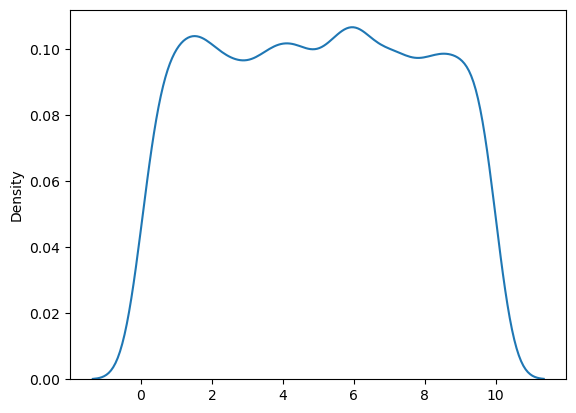

In [43]:
sns.kdeplot(data = uniform_data)
plt.show()

In the code above, we generated $10,000$ data points from a uniform distribution spanning the range $0$ to $10$. In the density plot, we see that the density of our uniform data is essentially level meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to $1$.

**rvs()** generates random numbers from the specified distribution. The arguments to **rvs()** will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.).

**cdf()** is used to determine the probability that an observation drawn from a distribution falls below a specified value.

In essence, **cdf()** gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a $25\%$ chance that an observation will be in the range $0$ to $2.5$ and a $75\%$ chance it will fall in the range $2.5$ to $10$. We can confirm this with **cdf()**:

In [44]:
uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
            loc=0,         # Distribution start
            scale=10)      # Distribution end

0.25

**ppf()** is the inverse of **cdf()**: it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use **ppf()**:

In [45]:
uniform.ppf(q=0.4,         # Probability cutoff
            loc=0,         # Distribution start
            scale=10)      # Distribution end

4.0

**pdf()** gives you the probability density (height of the distribution) at a given $x$ value. Since the uniform distribution is flat, all $x$ values within its range will have the same probability density and $x$ values outside the range have a probability density of $0$:

In [46]:
for x in range(-1,12):
    print("Density at x value " + str(x))
    print(uniform.pdf(x, loc=0, scale=10))

Density at x value -1
0.0
Density at x value 0
0.1
Density at x value 1
0.1
Density at x value 2
0.1
Density at x value 3
0.1
Density at x value 4
0.1
Density at x value 5
0.1
Density at x value 6
0.1
Density at x value 7
0.1
Density at x value 8
0.1
Density at x value 9
0.1
Density at x value 10
0.1
Density at x value 11
0.0


### Assignment 8
Buses arrives at a specified stop at $15$ minute intervals starting at $7$ AM. Rishab arrive at $7$, $7:15$, $7:30$, $7:45$, and so on. If a passenger arrives at the stop at a time taht is uniformly distributed between $7$ and $7:30$, find the probability that he waits:
1. less than $5$ minutes for a bus.
2. more than $10$ minutes for a bus.

**Solution**: - Let $X$ denotes the number of minutes past 7 that the Rishabh arrives at the stop. Since $X$ is a uniform random variable over the interval $(0,30)$, it follows that he will have to wait less than 5 minutes if and only if he arrives between $7:10$ and $7:45$ or between $7:25$ and $7:30$. Hence, the desires probability for part 1 is 
$$P\{10<X<15\} + P\{25<X<30\}$$

In [47]:
a = 0
b = 30
P_10_X_15 = uniform.cdf(15, loc = a, scale = (b-a)) - uniform.cdf(10, loc = a, scale = (b-a))
P_25_X_30 = uniform.cdf(30, loc = a, scale = (b-a)) - uniform.cdf(25, loc = a, scale = (b-a))
req = P_10_X_15 + P_25_X_30
print("The probability that Rishabh waits less than 5 minutes for a bus:", req)

The probability that Rishabh waits less than 5 minutes for a bus: 0.3333333333333333


Similarly, he would have to wait more than $10$ minutes if he arrives between $7$ and $7:05$ or between $7:15$ and $7:20$, so the probability for part (b) is
$$P\{0<X<5\} + P\{15<X<20\}$$

In [48]:
a = 0
b = 30
P_0_X_5 = uniform.cdf(5, loc = a, scale = (b-a)) - uniform.cdf(0, loc = a, scale = (b-a))
P_15_X_20 = uniform.cdf(20, loc = a, scale = (b-a)) - uniform.cdf(15, loc = a, scale = (b-a))
req = P_10_X_15 + P_25_X_30
print("The probability that Rishabh waits less than 5 minutes for a bus:", req)

The probability that Rishabh waits less than 5 minutes for a bus: 0.3333333333333333


## Exponential Distribution
A random variable $X$ has an **exponential distribution** and it is referred to as exponential random variable if and only if its probability density is given by:

$g(x;\lambda) = \lambda e^{-\lambda x}$ for $x\geq0$ and $\lambda > 0$ is the parameter of the distribution, often called the *rate parameter*.

The exponential distribution descirbes how long it takes for a continuous process to change state. The exponential distribution is the probability distribution of the time between events in a Poisson point process in probability and statistics.

Let's generate some uniform data and plot a curve:

In [49]:
from scipy.stats import expon

In [50]:
expon_data = expon.rvs(size=10000,  # Specify output shape
                        loc = 0,       # Specify the location of the distribution. Default 
                        scale = 1/10)  # Specify the scale parameter, beta = 1/lambda. Must be non-negative. Default is 1.0.

In [51]:
np.mean(expon_data)

0.09914074777938149

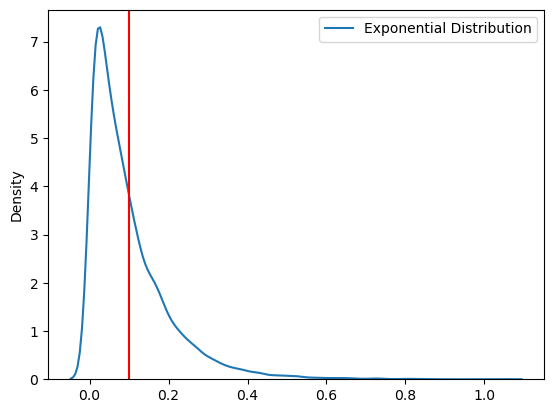

In [52]:
sns.kdeplot(data = expon_data)
plt.legend(['Exponential Distribution', 'Mean'])
plt.axvline(np.mean(expon_data), color = 'red', label = 'mean')
plt.show()

**rvs()** is used to generates random numbers from the distribution.

**Syntax: -** *expon.rvs(loc = 0, scale = 1, size = 1)*

**cdf()** is used to determine the probability that an observation drawn from a distribution falls below a specified value.

**Syntax: -** *expon.cdf(x, loc = 0, scale = 1)*

**ppf()** is the inverse of **cdf()**: it returns the $x$ axis cutoff value (quantile) associated with a given probability.

**Syntax: -** *expon.ppf(q, loc = 0, scale =1)*

**pdf()** gives you the probability density (height of the distribution) at a given $x$ value.

**Syntax: -** *expon.pdf(x, loc = 0, scale = 1)*

**Parameters**

|Parameter| |
| --- | --- |
| x - | Required. Specify float or array_like of floats representing random variables|
| q - | Required. Specify float or array_like of floats representing probabilities |
| loc - | Optional. Specify the location of the distribution. Default is 0 |
| scale - | Optional. Specify the scale parameters $\frac{1}{\lambda}$. Must be non-negative. Default is 1|
| size - | Optional. Specify output shape|

### Assignment 9
Suppose that the length of a phone call ion minutes is an exponential random variable with parameter $\lambda = \frac{1}{10}$. If someone arrives immediately ahead of you at a public telephone booth, find the probability that you will have to wait
1. more than $10$ minutes
2. between $10$ and $20$ minutes

In [53]:
# To find P{X>10} = 1-F(10)

l = 1/10

cdf = expon.cdf(x=10, scale =1/l)
req = 1-cdf

print("The probability for waiting more than 10 min:", req)

The probability for waiting more than 10 min: 0.36787944117144233


In [54]:
# P{10<X<20}

cdf_20 = expon.cdf(x=20, scale = 1/l)
cdf_10 = expon.cdf(x=10, scale = 1/l)

req = cdf_20 - cdf_10
print("The probability for waiting more than 10 min but less than 20 min:", req)

The probability for waiting more than 10 min but less than 20 min: 0.23254415793482963


## Normal Distribution
This is a subcategory of continuous probability distribution which can also be called a **Gaussian distribution**. A random variable $X$ has a **normal distribution** and it is referred to as a normal random variable if and only if its probability density is given by:


$f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}}e^{-(x - \mu)^2/ 2\sigma^2}$, for $-\infty < x < \infty$

where $\mu$ is mean and $\sigma^2$ is variance

**Normal Distribution** is the default probability for many real-world scenarios. It represent a **symmetric distribution** where most of the observations cluster around the central peak called as **mean** of the distribution.

**Gaussian Distribution** which typically has two parameters: **mean** and **standard deviation**. The probabilities for values occurring near the mean are higher than the values far away from the mean.

Let us general normal distributed data and plot curve.

In [55]:
from scipy.stats import norm

In [56]:
mean = 2
std = 3
norm_data = norm.rvs(size = 10000,
                    loc = mean,
                    scale = std)

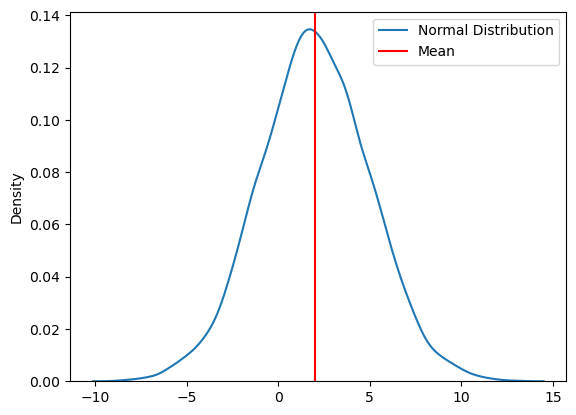

In [57]:
sns.kdeplot(data = norm_data)
plt.axvline(mean, color = 'red', label = 'mean')
plt.legend(['Normal Distribution', 'Mean'])

plt.show()

**rvs()** is used to generates random numbers from the distribution.

**Syntax: -** *norm.rvs(loc = mean, scale = std, size = 1)*

**cdf()** is used to determine the probability that an observation drawn from a distribution falls below a specified value.

**Syntax: -** *norm.cdf(x, loc = mean, scale = std)*

**ppf()** is the inverse of **cdf()**: it returns the $x$ axis cutoff value (quantile) associated with a given probability.

**Syntax: -** *norm.ppf(q, loc = mean, scale = std)*

**pdf()** gives you the probability density (height of the distribution) at a given $x$ value.

**Syntax: -** *norm.pdf(x, loc = mean, scale = std)*

### Assignment 10
If $X$ is a normal random variable with parameter $\mu =3$ and $\sigma^2 = 9$. find $P\{|X-3|>6\}$

$$|X-3|>6$$
$$\implies (X-3) > 6 \text{ and } -(X-3)>6$$
$$\implies X-3 > 6 \text{ and } X-3 < -6 $$
$$\implies X > 6+3 \text{ and } X < -6+3 $$
$$\implies X > 9 \text{ and } X < -3 $$

thus, $P\{|X-3|\}>6$ equals to $P\{X>9\}$ and $P\{X<-3\}$

In [58]:
#P{X>9} = 1-F(9)

cdf_9 = norm(loc = mean, scale = std).cdf(9)
P_X_9 = 1 - cdf_9

#P{X<-3} = F(-3)

cdf_3 = norm(loc = mean, scale = std).cdf(-3)

req = P_X_9 + cdf_3

print("P{|X-3|}>:", req)

P{|X-3|}>: 0.05760568090146002
